In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad
from scipy import ndimage, misc
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots
#import matplotlib.style as style
#style.use('seaborn')

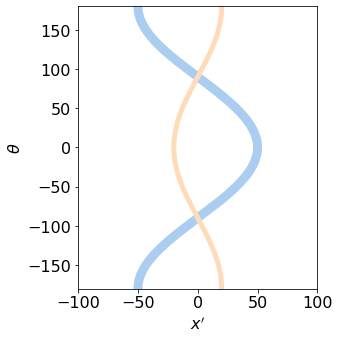

In [2]:
fig1= plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 16}) 

f01=lambda x:50* np.cos(x+0*np.pi/2)
f02=lambda x:20* np.cos(x+6*np.pi/6)
x = np.linspace(-np.pi,np.pi,200)

plt.plot(f01(x),x*180/np.pi,color='#abcdef',linewidth=9)
plt.plot(f02(x),x*180/np.pi,color='#fedcba',linewidth=5)

plt.xlim([-100,100])
plt.ylim([-180,180])
plt.xlabel(r"$x'$")
plt.ylabel(r"$\theta$")

plt.tight_layout()


#plt.savefig('fourier-radon-fig4.png')
plt.show()

$$\displaystyle \begin{align}p(\theta,x')=&\int_{-\infty}^\infty\int_{-\infty}^\infty \delta(x_0)\delta(y_0)\delta(\;x\cos(\theta)+y\sin(\theta)-x')dxdy \\=&\; \delta(\;x_0\cos(\theta)+y_0\sin(\theta)-x') \end{align}\tag{6}$$

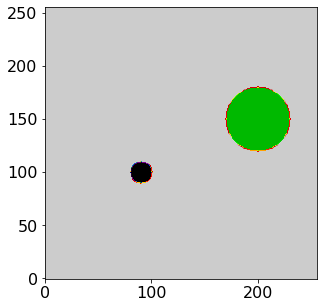

In [3]:

# start again with filled in image 
fig1b= plt.figure(figsize=(5, 5))


nx = 2**8
ny = nx
nc = nx//2
nt = nx
x = np.linspace(0,nx,nx)
y = np.linspace(0,ny,ny)

image1 = np.zeros((nx,ny),dtype=float)
imageA = np.zeros((nx,ny),dtype=float)

x0a  = 200  # init values
y0a  = 150
rada = 30
x0b  = 90
y0b  = 100
radb = 10

for i in range(nx):
    for j in range(ny):
        image1[i,j]=0
        imageA[i,j]=0
        if (j-x0a)**2+(i-y0a)**2 <= rada**2:
            image1[i,j] = 20
            imageA[i,j] = 20        
        if (j-x0b)**2+(i-y0b)**2 <= radb**2:
            image1[i,j] = 40
            imageA[i,j] = 40

    pass

plt.imshow(image1,origin='lower',cmap='nipy_spectral_r')

plt.show()

In [4]:
 # rotate array 2D array and sum over index      #for sinogram  p[angle nt ][position nx] 

p = np.zeros((nt,nt),dtype=int)
for i in range(0,nt,1):
    theta= (i*360/nt)                        # angle degrees
    temp = ndimage.rotate(image1, theta, reshape = False)
    for j in range(nt):
        p[i,j] = np.sum(temp[:,j])
   

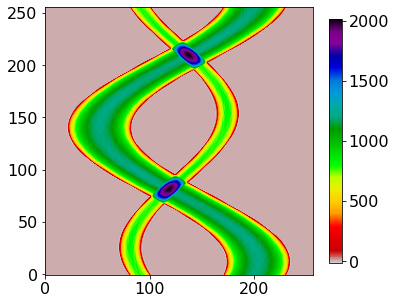

2019

In [5]:

fig1a= plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 16})  # set font size for plots
plt.imshow(p,cmap='nipy_spectral_r',origin='lower')
plt.colorbar(shrink=0.75)
plt.show()
np.max(p[:,:])

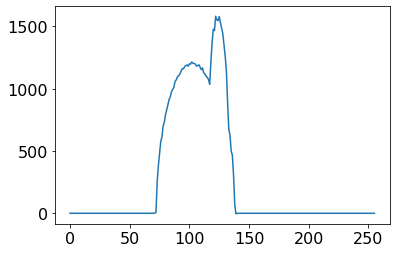

In [6]:
plt.plot(p[90,:])

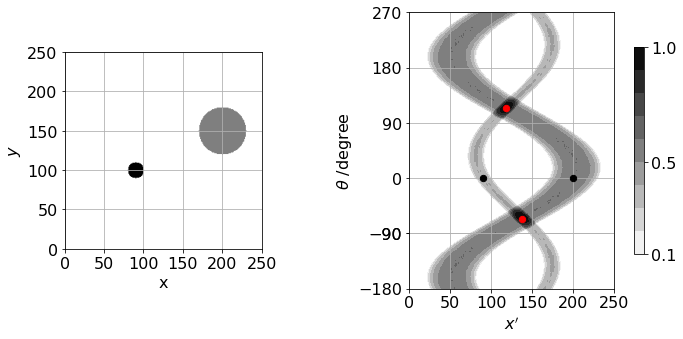

In [7]:


fig11= plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 16})  # set font size for plots

(ax0,ax1)=fig11.subplots(1,2, gridspec_kw={'width_ratios': [1,2],'height_ratios':[1]})

#ax0.contourf(X,Y,Z ,levels=[1,20],cmap='viridis',zorder=5)
#ax0.contourf(imageA,origin='lower',levels=[10,11],cmap='winter')
ax0.imshow(imageA,cmap='gray_r')
ax0.set_xlabel('x')
ax0.set_ylabel(r"$y$")
ax0.set_aspect(1)
ax0.set_ylim([0,250])
ax0.set_xlim([0,250])
ax0.set_xticks( [0,50,100,150,200,250] )
ax0.set_yticks( [0,50,100,150,200,250] )
ax0.grid('on')


#ax1.contourf(x,theta,p,levels=[0.1,16],cmap='hot')  # use symmetry to get other signals
x1 = np.linspace(0,nt,nt)
y1 = np.linspace(0,360,nt)
mx = np.max(p)
X1,Y1 = np.meshgrid(x1,y1)              # all X1 same in rows, all Y1 same in cols
im=ax1.contourf(X1,Y1,p[:,:]/mx,cmap='gray_r',levels=[0.1+i/10 for i in range(10)])
ax1.contourf(X1,-Y1,p[::-1,:]/mx,cmap='gray_r',levels=[0.1+i/10 for i in range(10)])


#ax1.contourf(x,theta,p,levels=[2,12],cmap='hot')
#ax1.contourf(-x,-theta,p[::-1][:],levels=[2,12],cmap='hot')
#ax1.contourf(-x,-theta+360,p[::-1][:],levels=[2,12],cmap='hot')

ax1.set_ylim([-180, 270])
ax1.set_xlim([0,250])
ax1.set_xlabel(r"$x'$")
ax1.set_ylabel(r"$\theta$ /degree")
ax1.set_aspect(0.75)
ax1.set_yticks( [-180,-90, -90,0, 90,180,270] )
ax1.set_xticks( [0,50,100,150,200,250] )

ax1.scatter(x0a,0,color='black',s=40,zorder=4)
ax1.scatter(x0b,0,color='black',s=40,zorder=4)

ax1.scatter(nc-10,90+24,color='red',s=40,zorder=4)

ax1.scatter(nc+10,-180+90+24,color='red',s=40,zorder=4)
plt.colorbar(im,shrink=0.75,ticks=[0.1,0.5,1])
plt.grid('on')
plt.tight_layout()

#plt.savefig('fourier-radon-fig4.png')

plt.show()            

In [8]:

def rota(angle,j):  # in radians
    
    xr = (x-x[j])*np.cos(angle) # rotate about centre of line 
    yr = (x-x[j])*np.sin(angle) 
    return xr,yr
#----------------------------

In [9]:
x0a  = 200  # init values
y0a  = 150
rada = 30
x0b  = 90
y0b  = 100
radb = 10

In [10]:
# get angle and distnce from rotation axis   need to check value of B
# dist from point to line p 292 book. d=|a x b|/|b|
for i in range(20,30,1):
    phi=i*np.pi/180
    B = np.array([np.cos(phi),np.sin(phi),0])
    A = np.array([-np.cos(phi),-np.sin(phi),0])
    pa= np.array([x0a,y0a,0])
    pb= np.array([x0b,y0b,0])
    
    b = B - A
    aa= pa - A
    bb= pb - A
    
    aacb = np.cross(aa,b)
    bbcb = np.cross(bb,b)
    da = np.sqrt(np.dot(aacb,aacb))/np.sqrt(np.dot(b,b))
    db = np.sqrt(np.dot(bbcb,bbcb))/np.sqrt(np.dot(b,b))
    print('{:6.3f} {:6.3f} {:6.3f}'.format(phi*180/np.pi,da,da-db) )
    

20.000 72.550  9.362
21.000 68.363  7.259
22.000 64.156  5.152
23.000 59.930  3.045
24.000 55.684  0.936
25.000 51.423 -1.173
26.000 47.145 -3.281
27.000 42.853 -5.389
28.000 38.548 -7.494
29.000 34.231 -9.598


In [11]:
np.sqrt(np.dot(bbcb,bbcb))/np.sqrt(np.dot(b,b))

(256, 256) (256, 256)


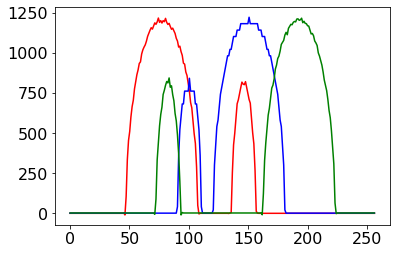

In [12]:
print(X1.shape,p.shape)
plt.plot(X1[0,:],p[int(150/360*nt),:] ,color='red')
plt.plot(X1[0,:],1+p[int(90/360*nt),:] ,color='blue')
plt.plot(X1[0,:],2+p[int(50/360*nt),:] ,color='green')
#plt.xlim([-50,50])
#plt.xticks([-50,-25,0,25,50])
plt.show()

In [13]:
# Back projection

imtest = np.zeros((nt,nt),dtype = float)  # add ine line of sinogram at different angles
imk = np.zeros((nt,nt),dtype = float)
temp= np.zeros( nt,dtype = float)
for j in range(0,180,1):            # jth  row of p angle j
    indx = int(j*nt/360)            # get index 360 degreees nt points
    temp[:]  =  p[indx,:]            # get a row from sinogram
    for k in range(nt):        
        imk[k,:] = temp[:]          # smear or project values all the same value in : 
    imtest = imtest +  ndimage.rotate(imk, j,reshape=False)# arotate(imk,nt,j)  # rotate and add 
    
#plt.plot(temp) 

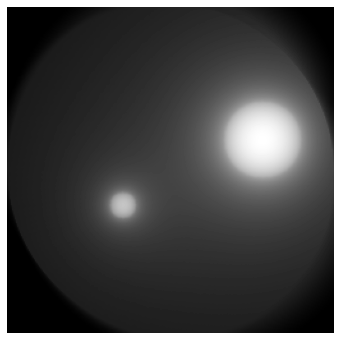

In [14]:
fig34a= plt.figure(figsize=(6, 6))    # back projection 
mx=np.max(imtest)
#plt.contourf(imtest/mx,cmap='hot',levels=[0.4,0.6,0.8,0.99])
plt.imshow(imtest/mx,origin='upper',cmap='gray')
#plt.axvline(nc,linewidth=0.5)
#plt.axhline(nc,linewidth=0.5)
#plt.colorbar(shrink=0.5)
plt.axis('Off')
plt.show()

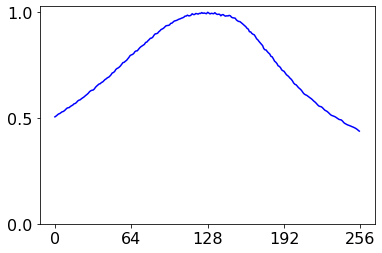

In [15]:
mx=np.max(imtest[:,nc])
plt.plot(imtest[:,nc]/mx,color='blue')
plt.yticks([0,0.5,1])
plt.xticks([0,nc//2,nc,1.5*nc,2*nc])
#plt.plot((p[nc,::-1]) )
#x=np.linspace(0,nt,1000)
#plt.plot(x-1,6.0*abs(1/(x-nc+1e-10)) )
#plt.yscale('log')
#plt.xlim([100,150])
#plt.ylim([0,1])
plt.show()

In [16]:
# now try filtered back projection ::: FT multiply by omega then reverse FT
# p is sinogram
imtestA = np.zeros((nt,nt),dtype = complex)  # add ine line of sinogram at different angles
imk =     np.zeros((nt,nt),dtype = float)
temp=     np.zeros( nt,dtype = complex)
omega =   np.zeros( nt,dtype = complex)
for i in range(nt):
    omega[i] = abs(i-nc) #*np.exp(-(i-nc)**2/(10.05*nt))
omega[0] = 0
omega[nt-1] = 0
for j in range(0,180,1):            # jth  row of p angle j
    indx = int(j*nt/360)
    temp[:] = np.fft.fftshift(np.fft.fft( p[indx,:] ) )   # one line of sinogram  to FT
    temp[:] = np.fft.fftshift(temp[:]*omega[:] )          # filter 
    temp[:] = np.fft.ifft(temp[:]) 
    #sinoA[indx,:]= temp[:]
    for k in range(nt):        
        imk[k,:] =  np.real( temp[:]  )
    imtestA = imtestA + ndimage.rotate(imk, j,reshape = False)

#plt.plot(omega)

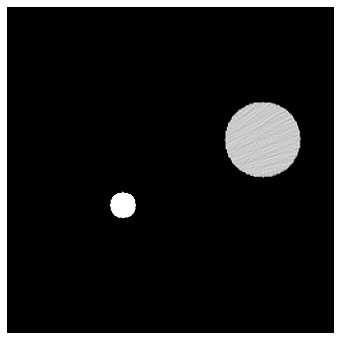

In [17]:

fig34b= plt.figure(figsize=(6, 6))    # back projection 
mx=np.max(np.real(imtestA) )
#plt.contourf(np.real(imtestA)/mx,origin='lower',cmap='jet',levels=[0.1+i/10 for i in range(5)])
plt.imshow(np.real(imtestA)/mx,origin='upper',cmap='gray')
#plt.axvline(nc,linewidth=0.5)
#plt.axhline(nc,linewidth=0.5)
#plt.colorbar()
plt.clim([0.2,0.5])
plt.axis('Off')
plt.show()

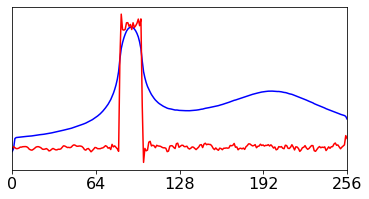

In [18]:
fig34c= plt.figure(figsize=(6, 3))
x=np.linspace(0,nt,nt)
#plt.plot(x,0.2+imtestA[150,:]/np.max(imtestA[150,:]),color='red')
plt.plot(x,(np.real(imtest[150,:]))/np.max(np.abs(imtest[150,:]) ),color='blue' )
plt.plot(x,0.1+np.real(imtestA[150,:])/np.max(np.abs(imtestA[150,:]) ),color='red')
plt.xlim([0,250])
plt.xticks([0,nc//2,nc,1.5*nc,2*nc])
plt.yticks([])
#plt.axis('off')

plt.show()

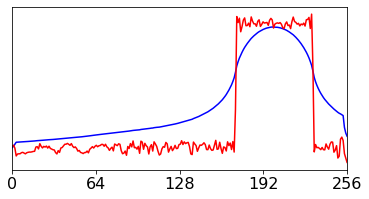

In [19]:
fig34d= plt.figure(figsize=(6, 3))
x = np.linspace(0,nt,nt)
#plt.plot(x,0.2+imtestA[150,:]/np.max(imtestA[150,:]),color='red')
plt.plot(x,(np.real(imtest[100,:]))/np.max(np.abs(imtest[100,:]) ),color='blue' )
plt.plot(x,0.1+np.real(imtestA[100,:])/np.max(np.abs(imtestA[100,:]) ),color='red')
plt.xlim([0,250])
plt.yticks([])
plt.xticks([0,nc//2,nc,1.5*nc,2*nc])
#plt.axis('off')

plt.show()

/Users/godfreybeddard/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


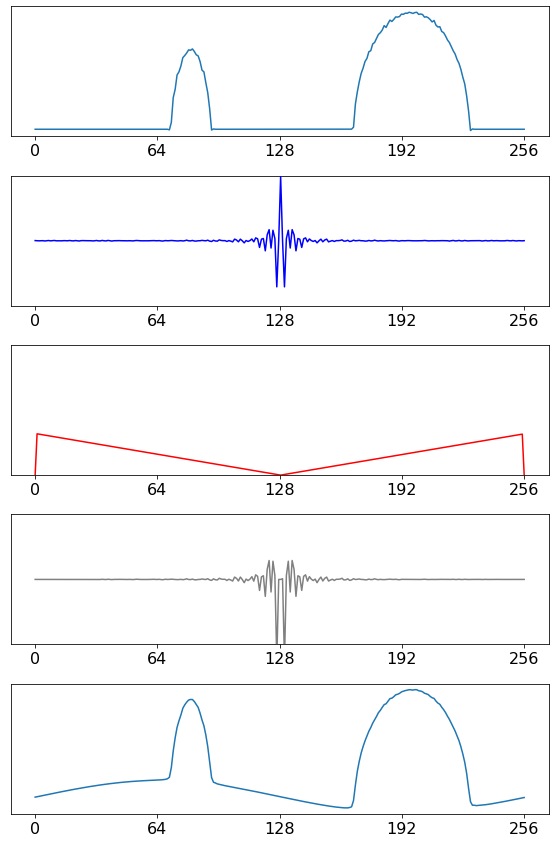

In [20]:

fig340a= plt.figure(figsize=(8, 12))
plt.rcParams.update({'font.size': 16})  # set font size for plots

ax = [0,0,0,0,0]
for i in range(len(ax) ):
    ax[i] = fig340a.add_subplot(5,1,i+1)
    #ax[i].set_aspect(1)
    #ax[i].set_xticks([])
    ax[i].set_yticks([])
    #ax[i].axis('off')
    #ax[i].set_xlim([-1,257])
    #ax[i].set_ylim([nt-q0,nt+q0])
    ax[i].set_xticks([0,64,128,128+64,256])
    #ax[i].set_yticks([])

x = np.linspace(0,nt,nt)
for i in range(nt):
    omega[i] = abs(i-nc)#*np.exp(-(i-nc)**2/(5.25*nt))
omega[0] = 0
omega[nt-1] = 0

pinit = p[int(30)][:]

ax[0].plot(x,pinit)

f01=(np.fft.fft(pinit)) 
ax[1].plot(x,np.real(np.fft.fftshift(f01) ),zorder=5,color='blue')
ax[1].set_ylim([-7e4,7e4])

ax[2].set_ylim([0,400])
ax[2].plot(x,omega[:] ,color='red')

ax[3].plot(x,np.real(np.fft.fftshift(omega[:]*f01[:]) ),color='grey')
ax[3].set_ylim([-5e6,5e6])
ax[4].plot(x[:], np.real(np.fft.ifft(omega[:]*f01[:])) )

plt.tight_layout()

plt.show()

In [21]:
def centrearray(A,nt):
    
    nmax = 2**10
    print(nmax,nt)
    nmc=nmax//2
    
    mat=np.zeros((nmax,nmax),dtype=complex)
    q=(nmax-nt)//2
    for i in range(nmax):    
        if i >= q and i <= nt + q:          # x
            for j in range(q,q+nt-1,1):     # y
                if j >= q:
                    mat[i,j]=A[i-q-1,j-q-1]
    return mat
#---------------------------------

1024 256


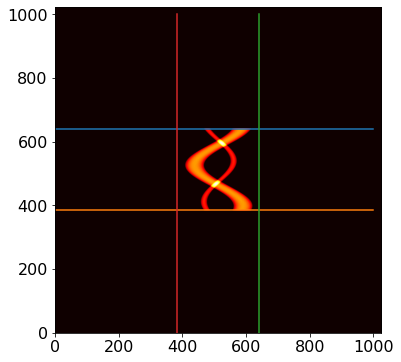

In [22]:
fig351= plt.figure(figsize=(6, 6))



mat=centrearray(p,nt)
plt.imshow(np.real(mat),cmap='hot',origin='lower' )


plt.plot([0,1000],[(2**10//2+nt)/2+nt, (2**10//2+nt)/2+nt])
plt.plot([0,1000],[(2**10//2+nt)/2, (2**10//2+nt)/2])

plt.plot([(2**10//2+nt)/2+nt, (2**10//2+nt)/2+nt],[0,1000])
plt.plot([(2**10//2+nt)/2, (2**10//2+nt)/2],[0,1000])
plt.show()

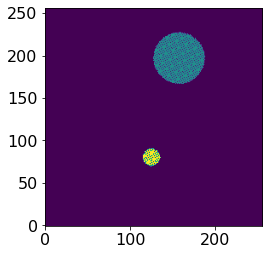

860 0


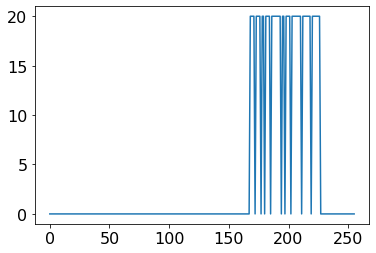

In [23]:
def rotimage(im,nt,theta):  #must be square
    
    p = np.zeros((nt,nt),dtype=int)
    angle = theta*np.pi/180.0
   
    cs = np.cos(angle)
    ss = np.sin(angle)
    nc = nt//2
    for i in range(nt):
        aa= (i-nc)*cs
        bb=-(i-nc)*ss
        for j in range(nt):
            ix = int( aa + (j-nc)*ss  + nc) # get index into array
            iy = int( bb + (j-nc)*cs  + nc)
            
            if ix < 0: ix = 0
            if iy < 0: iy = 0
            if ix > nt-1: ix = nt-1
            if iy > nt-1: iy = nt-1
            p[ix,iy] = im[i,j]
    return p
#-----------------------------------

def Arotimage(im,nt,theta):  #must be square 
    
    p = np.zeros((nt,nt),dtype=int)
    angle = theta*np.pi/180.0
   
    cs = np.cos(angle)
    ss = np.sin(angle)
    nc = nt//2
    indx = [i for i in range(nt)]
    
    aa = np.zeros(nt,dtype=float)
    bb = np.zeros(nt,dtype=float)
    for i in range(nt):
        aa[i]  = (indx[i]-nc)*cs
        bb[i] = -(indx[i]-nc)*ss
    
    for j in range(nt):
        ix = ( aa + (j-nc)*ss  + nc).astype(int) # get index into array
        iy = ( bb + (j-nc)*cs  + nc).astype(int)
        for i in range(nt):
            xx = ix[i]
            yy = iy[i]
            if xx < 0: xx = 0
            if yy < 0: yy = 0
            if xx > nt-1: xx = nt-1
            if yy > nt-1: yy = nt-1
            p[xx,yy] = im[i,j]
    return p
#-----------------------------------
nt = nx
p = np.zeros((nt,nt),dtype=int)
p = Arotimage(image1,nt,50)

plt.imshow(p,origin='lower')
plt.show()
print(sum( p[:,171]),sum(p[:,200]) )
x=[i for i in range(nt)]
plt.plot(x,p[:,150])

In [24]:
mat[450,600]

0j